# Simulate with Model I
Meaning of Functions:
1. $s(t)$: The susceptible population fraction (the number of individuals in danger of being infected, divided by the total population)
2. $e(t)$: The exposed population fraction (the number of individuals exposed to the virus but without having symptoms, divided by the total population).
3. $i(t)$: The infected population fraction (the number of infected individuals with symptoms, divided by the total population).
4. $r(t)$: The recovered population fraction (the number of recovered individuals, divided by the total population).
5. $p(t)$: The number of individuals that pass away due to the disease, divided by the total population).

Meaning of Parameters:
1. $\kappa$: The rate at which symptoms appear in exposed case.
2. $\alpha_i$: The contagion factor between the infected and susceptible population.
3. $\alpha_e$: The contagion factor between the exposed and susceptible population.
4. $\gamma$: The reinfection rate.
5. $\beta$: The recovery rate of the infected cases.
6. $\rho$: The recovery rate of the exposed cases.
7. $\mu$: The mortality rate of the infected cases.
8. $\epsilon_0$: The initial exposed population.

$\frac{ds(t)}{dt} = -\alpha_es(t)e(t) - \alpha_is(t)i(t)+ \gamma r(t)$\
$\frac{de(t)}{dt} = \alpha_es(t)e(t) + \alpha_is(t)i(t) - \kappa e(t) - \rho e(t)$ \
$\frac{di(t)}{dt} = \kappa e(t) - \beta i(t) - \mu i(t)$ \
$\frac{dr(t)}{dt} = \beta i(t) + \rho e(t) - \gamma r(t)$ \
$\frac{dp(t)}{dt} = \mu i(t)$


Initial: $(s(t),e(t),i(t),r(t),p(t)) = (1-p_0-\epsilon_0, \epsilon_0,0,0,p_0)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
Inputs:
    Model parameters: alpha_e, alpha_i, kappa, rho, beta, mu, gamma
    Initial conditions: x0 = [s0, e0, i0, r0, p0]
    Time Period to Simulate: T
    Time interval: dt
    Whether Plot the result: is_plot, True if wants to plot the results, default = False
Outputs:
    Simulation results: x = [s(t),e(t),i(t),r(t),p(t)]
'''
def SEIRP(alpha_e, alpha_i, kappa, rho, beta, mu, gamma, x0:list, T:int, dt, is_plot:bool = False):

    N = int(T/dt) # Number of simulation points

    x = np.array([np.zeros(N) for _ in range(5)])

    # Initiate x
    for i_func,val in enumerate(x0):
        x[i_func][0] = val

    for idx in range(1,N):

        # Current x values
        s,e,i,r,p = x[:,idx-1]

        # Update x following the above equations
        x[0][idx] = (-alpha_e*s*e - alpha_i*s*i + gamma*r)*dt + s
        x[1][idx] = (alpha_e*s*e + alpha_i*s*i - kappa*e - rho*e)*dt + e
        x[2][idx] = (kappa*e - beta*i - mu*i)*dt + i
        x[3][idx] = (beta*i + rho*e - gamma*r)*dt + r
        x[4][idx] = mu*i*dt + p

    # Plot the results
    if is_plot:
        s,e,i,r,p = x

        plt.figure(figsize=(10,5),dpi=100)
        plt.plot(np.linspace(0,T,N), s, label = 's(t)')
        plt.plot(np.linspace(0,T,N), e, label = 'e(t)')
        plt.plot(np.linspace(0,T,N), i, label = 'i(t)')
        plt.plot(np.linspace(0,T,N), r, label = 'r(t)')
        plt.plot(np.linspace(0,T,N), p, label = 'p(t)')
        plt.grid()
        plt.legend()
        plt.xlim(0,T)
        plt.ylim(0,1)
        plt.xlabel('days')
        plt.ylabel('population ratio')
        plt.show()

    return x

In [3]:
# The world death rate is 8 per 1000 person in 2019 prior to the pandemic
p0 = 8e-3
# Use a small ratio to stimulate the initial condition
e0 = 1e-8

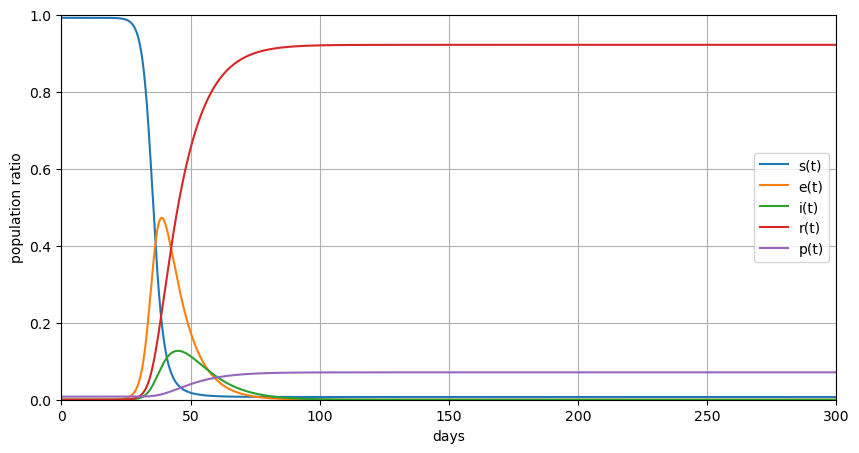

In [4]:
'''
Test case 1:
    Simulate with: alpha_e = 0.65, alpha_i = 0.005, kappa = 0.05, rho = 0.08, beta = 0.1, mu = 0.02, gama = 0
    Over 10 months
'''
T = 300
dt = 0.01
s,e,i,r,p = SEIRP(0.65, 0.005, 0.05, 0.08, 0.1, 0.02, 0, [1-p0-e0,e0,0,0,p0], T, dt, True)

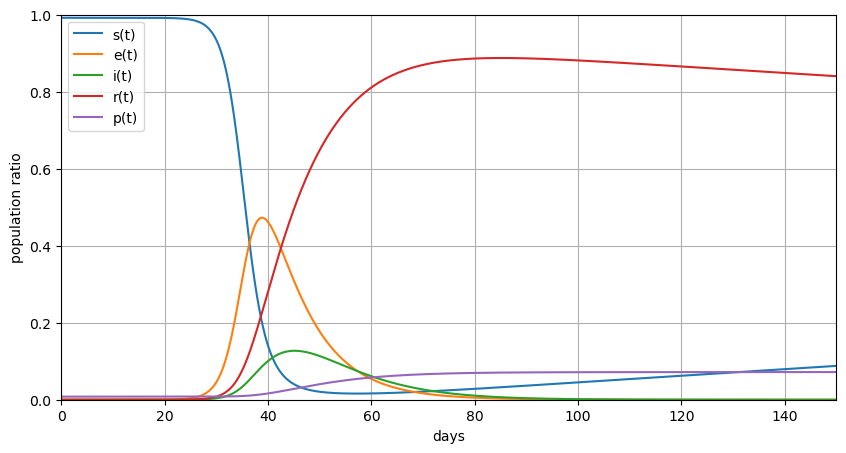

In [5]:
'''
Test case 2:
    Simulate with: alpha_e = 0.65, alpha_i = 0.005, kappa = 0.05, rho = 0.08, beta = 0.1, mu = 0.02, gama = 0.001
    Over 5 months
'''
T = 150
dt = 0.01
s,e,i,r,p = SEIRP(0.65, 0.005, 0.05, 0.08, 0.1, 0.02, 0.001, [1-p0-e0,e0,0,0,p0], T, dt, True)

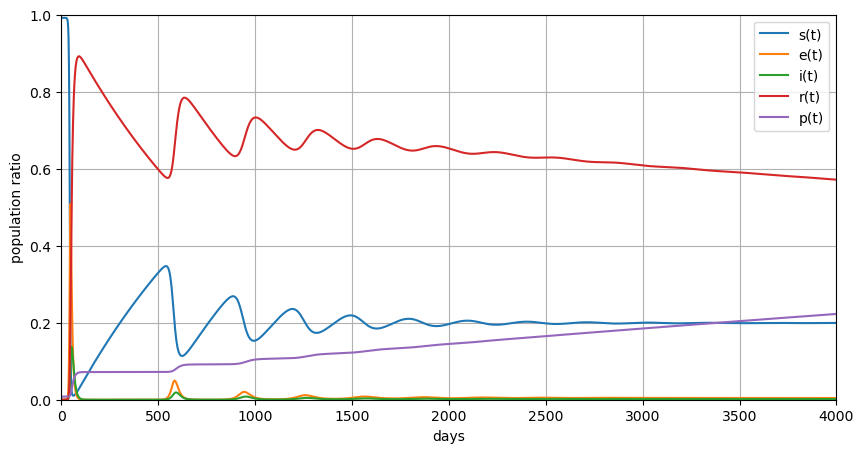

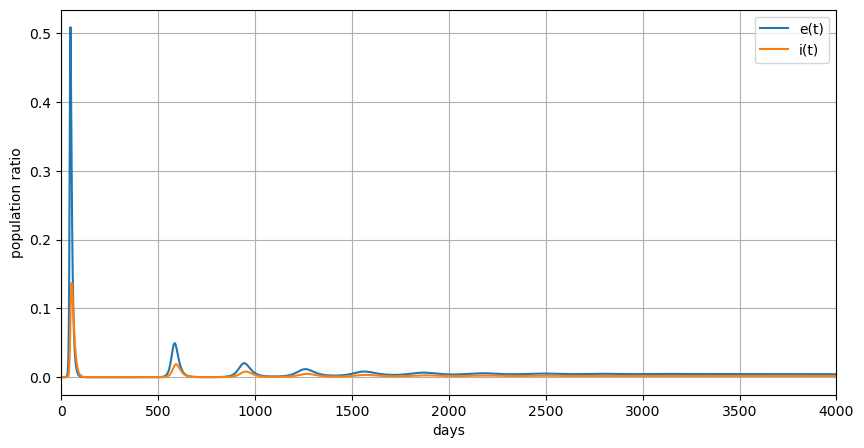

In [6]:
'''
Test case 3:
    Simulate with: alpha_e = 0.65, alpha_i = 0.005, kappa = 0.05, rho = 0.08, beta = 0.1, mu = 0.02, gama = 0.001
    Over 10 years
'''
T = 4000
dt = 1
s,e,i,r,p = SEIRP(0.65, 0.005, 0.05, 0.08, 0.1, 0.02, 0.001, [1-p0-e0,e0,0,0,p0], T, dt, True)

plt.figure(figsize=(10,5),dpi=100)
plt.plot(np.linspace(0,T,int(T/dt)), e, label = 'e(t)')
plt.plot(np.linspace(0,T,int(T/dt)), i, label = 'i(t)')
plt.grid()
plt.legend()
plt.xlim(0,T)
plt.xlabel('days')
plt.ylabel('population ratio')
plt.show()